In [45]:
# https://www.tensorflow.org/tutorials/keras/classification
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [46]:
#Fashion MNIST veri kümesini içe aktar
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [47]:
#Her görüntü tek bir etiketle eşleştirilir. 
#Sınıf adları veri kümesine dahil edilmediğinden, daha sonra görüntüleri çizerken kullanmak için class_names değişkenine atadım.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [48]:
# veri sayılarını getir.
# eğitim setinde her bir görüntünün 28 x 28 piksel olarak temsil edildiği 60.000 görüntü bulunmaktedır.
train_images.shape

(60000, 28, 28)

In [49]:
# test veri seti bilgilerini getir.
# test veri setinde 10000 adet 28x28 piksel ebatlarında görüntü bulunmaktadır.
test_images.shape

(10000, 28, 28)

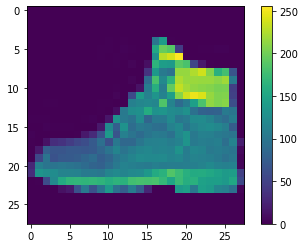

In [50]:
# Verileri önceden işleyin
# Ağı eğitmeden önce veriler önceden işlenmelidir. 
# Eğitim setindeki 90. resmi incelerseniz, piksel değerlerinin 0 ile 255 aralığında olduğunu göreceksiniz:
plt.figure()
plt.imshow(train_images[90])
plt.colorbar()
plt.grid(False)
plt.show()

In [51]:
# Bu değerleri sinir ağı modeline beslemeden önce 0 ila 1 aralığında ölçeklendirin. Bunu yapmak için değerleri 255'e bölün. 
# Eğitim seti ve test setinin aynı şekilde ön işlemden geçirilmesi önemlidir:
train_images = train_images / 255.0
test_images = test_images / 255.0

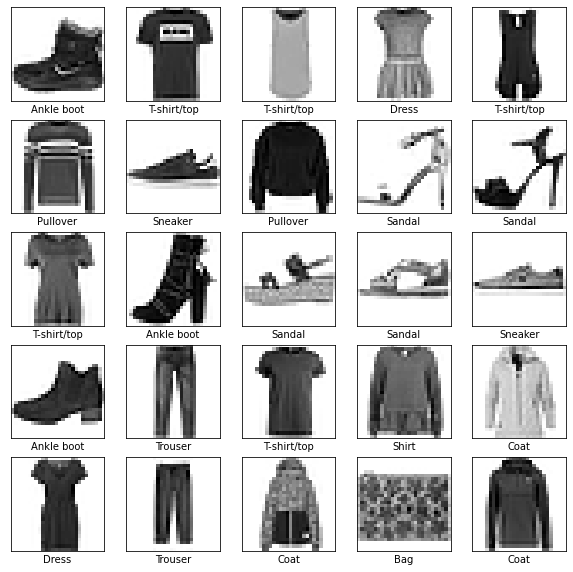

In [52]:
# Verilerin doğru biçimde olduğunu ve ağı kurmaya ve eğitmeye hazır olduğunuzu doğrulamak için eğitim setinden 
# ilk 25 görüntüyü gösterelim ve her görüntünün altında sınıf adını gösterelim.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [53]:
# Modeli oluşturalım
# Sinir ağını oluşturmak, modelin katmanlarını yapılandırmayı ve ardından modeli derlemeyi gerektirir.
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [54]:
# model derleniyor
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
# model eğitiliyor
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 520us/step - loss: 0.4995 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 1s 585us/step - loss: 0.3791 - accuracy: 0.8631
Epoch 3/10
1875/1875 [==============================] - 1s 559us/step - loss: 0.3416 - accuracy: 0.8756
Epoch 4/10
1875/1875 [==============================] - 1s 559us/step - loss: 0.3177 - accuracy: 0.8822
Epoch 5/10
1875/1875 [==============================] - 1s 558us/step - loss: 0.2995 - accuracy: 0.8884
Epoch 6/10
1875/1875 [==============================] - 1s 512us/step - loss: 0.2823 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 1s 515us/step - loss: 0.2699 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 1s 510us/step - loss: 0.2601 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 1s 513us/step - loss: 0.2502 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 1s 511u

In [56]:
# Doğruluğu değerlendir
# modelin eğitilmesinin ardından, modelin test veri kümesinde nasıl performans gösterdiğini karşılaştır
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3337 - accuracy: 0.8829

Test accuracy: 0.8828999996185303


In [57]:
# Test veri setindeki doğruluğun, eğitim veri setindeki doğruluktan biraz daha az olduğu ortaya çıktı. 
# Eğitim doğruluğu ve test doğruluğu arasındaki bu boşluk, aşırı uyumu temsil eder. 
# Aşırı uyum, bir makine öğrenimi modelinin yeni, daha önce görülmemiş girdilerde 
# eğitim verilerinde olduğundan daha kötü performans göstermesi durumunda meydana gelir. 
# Aşırı uyumlu bir model, eğitim veri setindeki gürültüyü ve ayrıntıları, 
# modelin performansını yeni veriler üzerinde olumsuz olarak etkileyecek bir noktaya kadar "ezberler".

In [58]:
#Eğitilen model ile bazı görüntüler hakkında tahminlerde bulunmak için kullanabilirsiniz. Modelin doğrusal çıktıları, günlükler . Logitleri, yorumlanması daha kolay olan olasılıklara dönüştürmek için bir softmax katmanı ekleyin.
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [61]:
predictions = probability_model.predict(test_images)
predictions[0]
np.argmax(predictions[0])

9

In [63]:
class_names[test_labels[0]]

'Ankle boot'

In [66]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

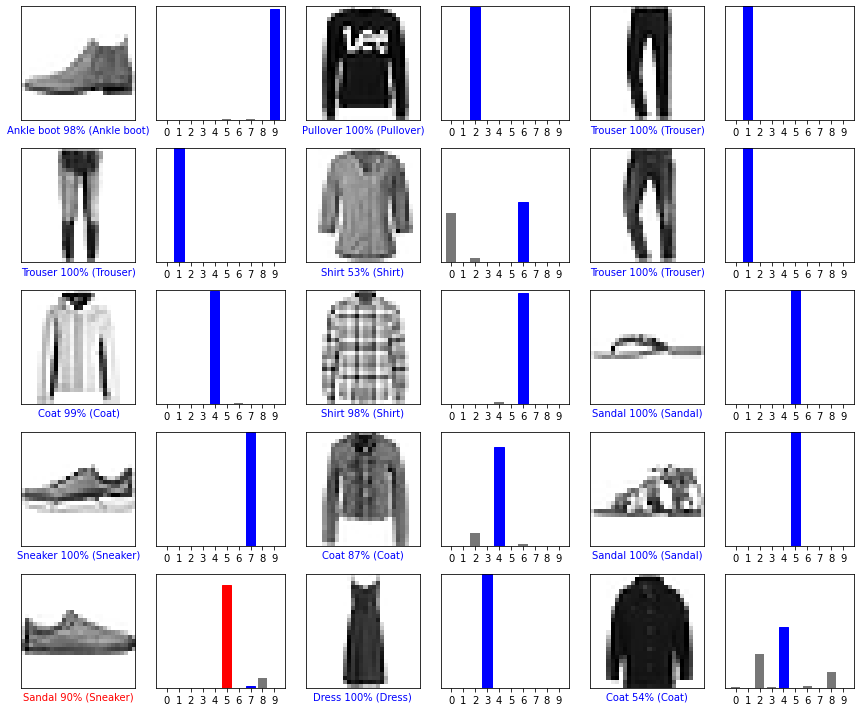

In [67]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [69]:
img = test_images[1]
print(img.shape)

(28, 28)
